<a href="https://colab.research.google.com/github/Anybody99901/PRODIGY_DS_05/blob/main/PRODIGY_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


We import necessary libraries:


pandas for data handling,



matplotlib & seaborn for visualizations,



folium for creating interactive maps and plotting accident hotspots.

In [11]:

df = pd.read_csv('UK_Accident.csv')  # Replace with actual file name
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1.0,Yes,E01002849,2005.0
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002909,2005.0
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002857,2005.0
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002840,2005.0
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1.0,Yes,E01002863,2005.0


Loads the UK Road Accident dataset from a CSV file and displays the first few rows to understand the structure.

In [12]:

print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898151 entries, 0 to 898150
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Unnamed: 0                                   898151 non-null  int64  
 1   Accident_Index                               898151 non-null  object 
 2   Location_Easting_OSGR                        898050 non-null  float64
 3   Location_Northing_OSGR                       898151 non-null  float64
 4   Longitude                                    898050 non-null  float64
 5   Latitude                                     898151 non-null  float64
 6   Police_Force                                 898151 non-null  int64  
 7   Accident_Severity                            898151 non-null  int64  
 8   Number_of_Vehicles                           898151 non-null  int64  
 9   Number_of_Casualties                         898151 non-nul

Displays data types and identifies any missing values in the dataset. This helps in cleaning and understanding which columns need attention.

In [13]:

df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Hour'] = df['Time'].dt.hour

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['DayOfWeek'] = df['Date'].dt.day_name()

<ipython-input-13-282041ad63e3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')



Converts 'Time' and 'Date' columns to datetime format and extracts:



Hour of the accident from Time



Day of the week from Date

This helps analyze accidents by time and day.

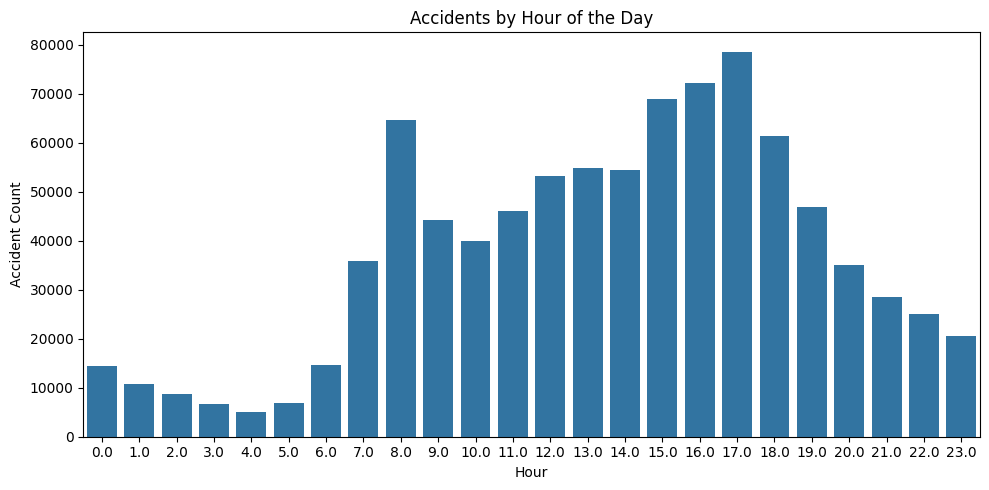

In [14]:

plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

Creates a bar plot to show how accidents vary across different hours of the day. Helps identify peak accident times.

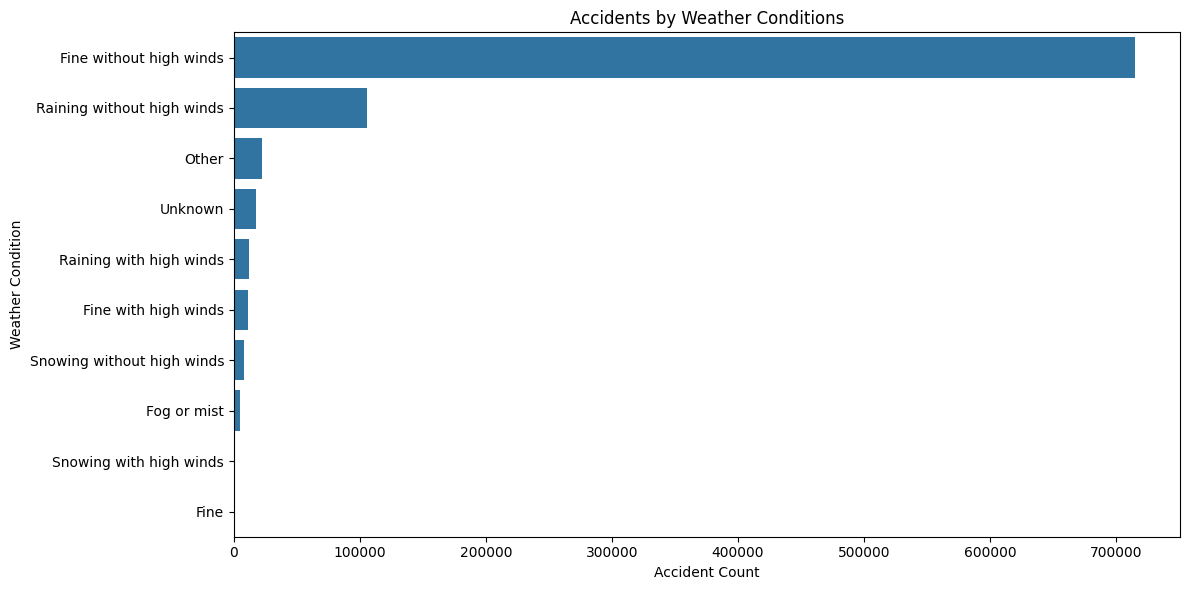

In [15]:

plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().index)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Accident Count')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


Visualizes how different weather conditions influence accident frequency. Useful for spotting risky weather.

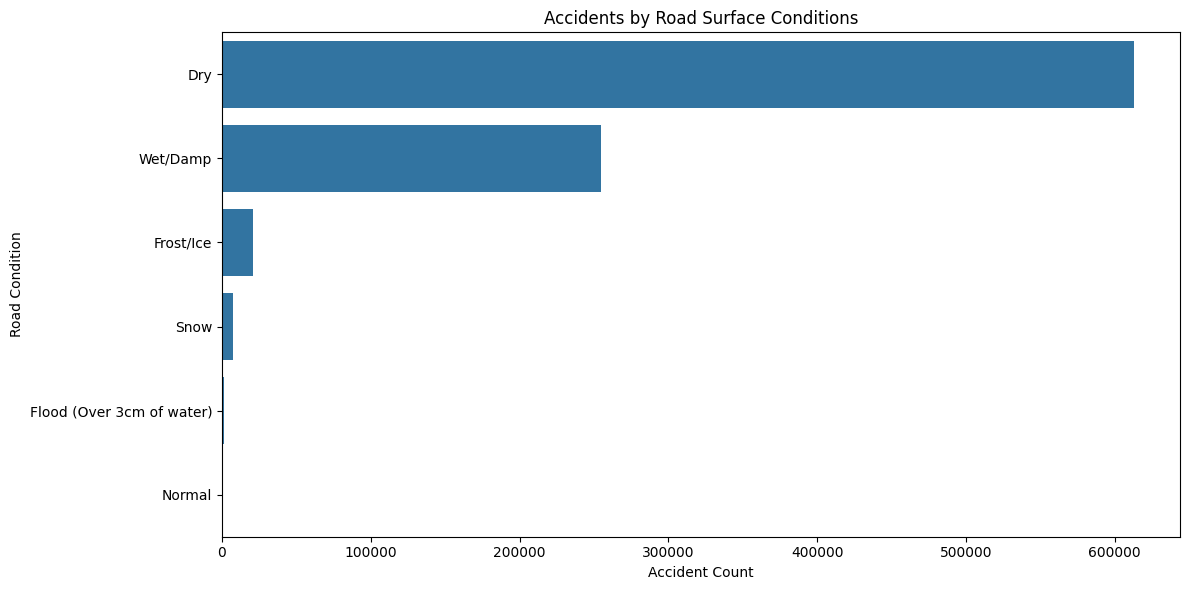

In [16]:

plt.figure(figsize=(12,6))
sns.countplot(y='Road_Surface_Conditions', data=df, order=df['Road_Surface_Conditions'].value_counts().index)
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Accident Count')
plt.ylabel('Road Condition')
plt.tight_layout()
plt.show()

Plots accidents against different road surface types (e.g., wet, dry, icy). Highlights the impact of road condition on safety.

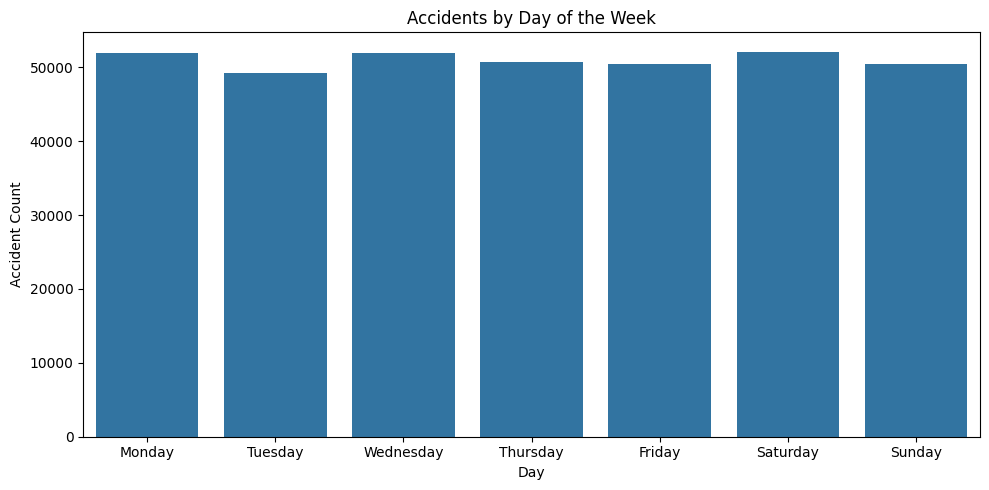

In [17]:

plt.figure(figsize=(10,5))
sns.countplot(x='DayOfWeek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

Analyzes accident distribution across the week. Helps discover high-risk days (e.g., weekends).

In [18]:

uk_map = folium.Map(location=[54.0, -2.0], zoom_start=6)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows() if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude'])]
HeatMap(heat_data[:5000]).add_to(uk_map)
uk_map


Creates an interactive heatmap showing accident hotspots based on latitude and longitude.